# Лабораторная работа №1
## РИ-681223 Черепанов Александр
### Вариант №19

In [46]:
# 1. Импортируем нужные библиотеки и функции
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings
import h5py
%matplotlib inline

In [47]:
# 2. Создаем ВР, являющийся выборкой случайной величины с нормальным распределением
X = rand.randn(10000)

In [48]:
# 3. Создаем для ВР ряд временных отсчетов, на которых он будет определен
t = np.linspace(3, 5, num = 10000) # линейный равномерный массив из 10000 элементов в интервале от 3 до 5.

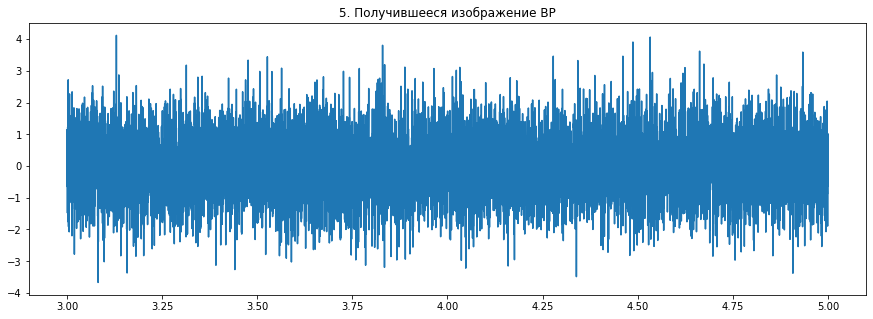

In [49]:
# 4. Строим ВР на заданной временной сетке
plt.figure(figsize= (15, 5))
plt.plot(t, X);
plt.title("5. Получившееся изображение ВР");

In [50]:
# 6. Расчитываем мат. ожидание для ВР
M = np.mean(X)
# Мат. ожидание можно оценить простым усреднением всех значений ВР по формуле 2.7:
M_manual = np.sum(X) / X.shape[0]
print("Результат применения функции mean(): ", M)
print("Расчитанное мат. ожидание для ВР: ", M_manual)

Результат применения функции mean():  -0.0028195792631668416
Расчитанное мат. ожидание для ВР:  -0.0028195792631668416


In [51]:
# 7. Расчитываем дисперсию для ВР
D = np.var(X)
# Оценка дисперсии по формуле 2.8:
D_manual = np.sum((X - M)**2) / X.shape[0]
print("Результат применения функции var(): ", D)
print("Расчитанная дисперсия для ВР: ", D_manual)

Результат применения функции var():  0.987631216795129
Расчитанная дисперсия для ВР:  0.987631216795129


In [52]:
# 8. Расчитываем ассиметрию для ВР
a = skew(X)
# Асимметрия (третий центральный момент) по формуле 2.9:
a_manual = np.sum((X - M)**3) / (X.shape[0] * D**3)
print("Результат применения функции skew(): ", a)
print("Ассиметрия ВР: ", a_manual)

Результат применения функции skew():  0.03987667936018068
Ассиметрия ВР:  0.04062812438920715


In [53]:
# 9. Расчитываем эксцесс для ВР
e = kurtosis(X, fisher= False)
# Эксцесс e (четвертый центральный момент) по формуле 2.10:
e_manual = np.sum((X - M)**4) / (X.shape[0] * D**5)
print("Результат применения функции kurtosis(): ", e)
print("Эксцесс  ВР: ", e_manual)

Результат применения функции kurtosis():  3.081318297376347
Эксцесс  ВР:  3.198542584900093


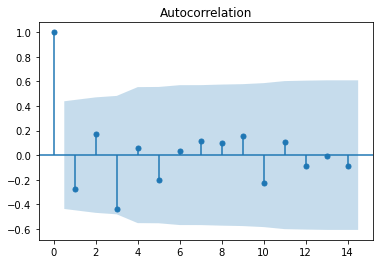

In [54]:
# 10. Строим оценку выборочной автокорреляции ВР при помощи функции plot_acf():
plot_acf(X[0:20]);

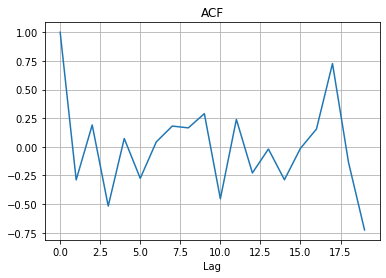

In [55]:
# 10. Строим оценку выборочной автокорреляции ВР на основе формулы (2.17):

# Оценка автокорреляционной функции:
def ac_estimator(x, lag):
  return np.mean(((x[:len(x)-lag] - np.mean(x)) * (x[lag:] - np.mean(x)))[:len(x)-lag])

# Кооэфициент автокорреляции:
def ac_coef(x, lag):
  return ac_estimator(x, lag) / ac_estimator(x, 0)

# Строим АКФ:
def draw_ac_plot(x, last_lag=20):
  lags = [i for i in range(last_lag + 1)]
  plt.plot(lags, list(map(lambda lag: ac_coef(x, lag), lags)))
  plt.grid()
  plt.title("ACF")
  plt.xlabel("Lag")

warnings.filterwarnings(action='ignore', message='Mean of empty slice')
warnings.filterwarnings(action='ignore', message='invalid value encountered in double_scalars')

draw_ac_plot(X[0:20]);

In [56]:
# 11. Полная функция, которая имеет один входной параметр – это исходный временной ряд для анализа.
#     Функция вычисяет мат.  ожидание,  дисперсию, асимметрию, эксцесс и строит АКФ:

def func(x):
  M = np.sum(x) / X.shape[0]
  D = np.sum((x - M)**2) / x.shape[0]
  a = np.sum((x - M)**3) / (x.shape[0] * D**3)
  e = np.sum((x - M)**4) / (x.shape[0] * D**5)
  draw_ac_plot(x)

  print("Мат. ожидание для ВР: ", M)
  print("Дисперсия для ВР: ", D)
  print("Ассиметрия ВР: ", a)
  print("Эксцесс  ВР: ", e)

In [57]:
# 12. Номер индивидуального варианта 19

[[ 0.2       ]
 [ 0.18836617]
 [-0.12289242]
 [ 0.11717481]
 [ 0.24774071]
 [ 0.32672352]
 [ 0.52690914]
 [-0.02189945]
 [ 0.06644619]
 [ 0.34883809]]
(128, 1)


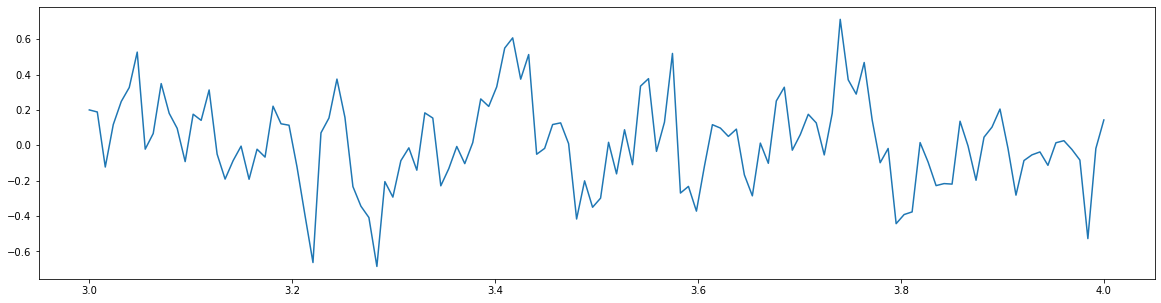

In [58]:
# 13. Загружаем из mat-файла массив ВР
Xmat = h5py.File('19.mat', 'r') 
Xmat = Xmat.get('z19')
Xmat = np.array(Xmat)
print(Xmat[:10])
print(Xmat.shape)
plt.figure(figsize= (20, 5))
plt.plot(np.linspace(3, 4, num=Xmat.shape[0]), Xmat);

Мат. ожидание для ВР:  0.00015083269888852973
Дисперсия для ВР:  0.06357666377685077
Ассиметрия ВР:  10.066224133845378
Эксцесс  ВР:  12834.843677127734


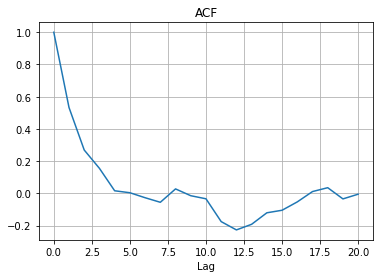

In [59]:
# 14. Используем уже написанную функцию (пункт 11) от этого ВР для того, чтобы получить все его базовые характеристики:
func(Xmat)

15. По коррелограмме ВР, видно, что наиболее высоким по модулю оказался коэффициент автокорреляции при лаге 1, что говорит о наличии в ВР тренда, который имеет убывающий характер. После первого лага самым высоким значением обладает коэффициент автокорреляции при лаге 2, что означает, что для каждой точки через одну наблюдаются скачки значений. Также большое по модулю значение коэффициента автокорреляции при лаге 12, что означает что ряд содержит периодические колебания.